In [1]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lending_data = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df_lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


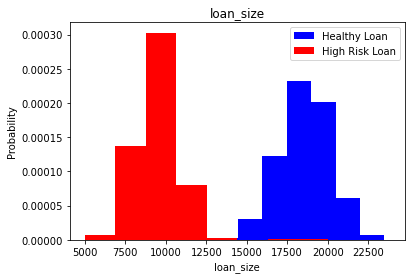

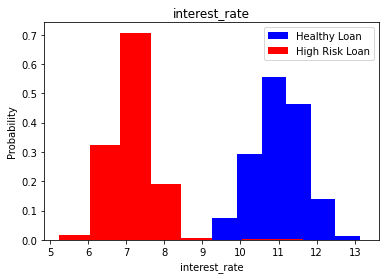

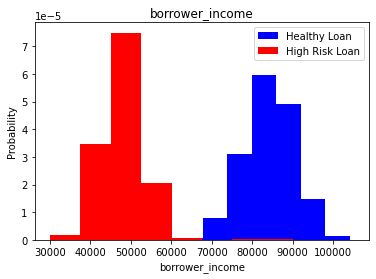

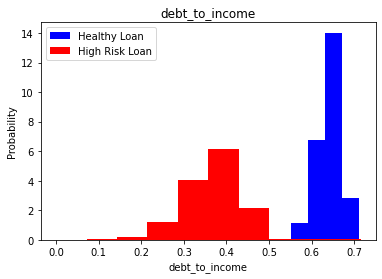

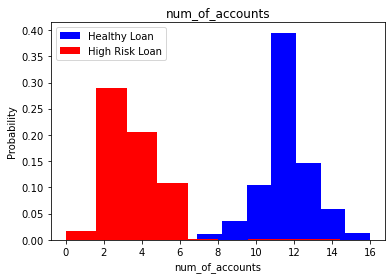

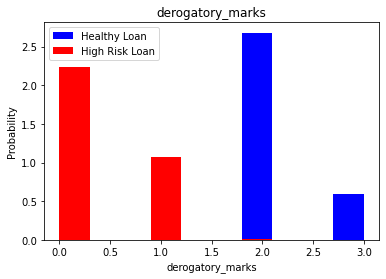

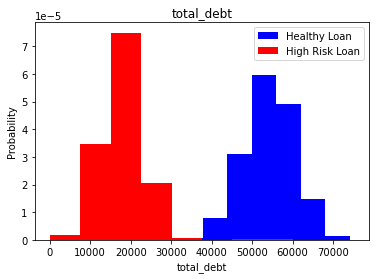

In [3]:
## graphically view the probabilities
cols = ['loan_size','interest_rate','borrower_income','debt_to_income','num_of_accounts','derogatory_marks','total_debt', 'loan_status']

for col in cols[:-1]:
    plt.hist(df_lending_data[df_lending_data['loan_status']==1][col], color='blue', label='Healthy Loan', alpha=1, density='True')
    plt.hist(df_lending_data[df_lending_data['loan_status']==0][col], color='red', label='High Risk Loan', alpha=1, density='True')
    plt.title(col)
    plt.ylabel('Probability')
    plt.xlabel(col)
    plt.legend()
    plt.show()

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = df_lending_data['loan_status']      ## labels

# Separate the X variable, the features
X = df_lending_data.drop(columns='loan_status')   ## features

In [5]:
y.head(), y.shape[0]

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: loan_status, dtype: int64,
 77536)

In [6]:
# Review the X variable DataFrame
X.head(), X.shape[0]

(   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
 0    10700.0          7.672            52800        0.431818                5   
 1     8400.0          6.692            43600        0.311927                3   
 2     9000.0          6.963            46100        0.349241                3   
 3    10700.0          7.664            52700        0.430740                5   
 4    10800.0          7.698            53000        0.433962                5   
 
    derogatory_marks  total_debt  
 0                 1       22800  
 1                 0       13600  
 2                 0       16100  
 3                 1       22700  
 4                 1       23000  ,
 77536)

### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
## loan_status
## 0 = healthy loan, 1 = high-risk-loan
y.value_counts(dropna=False)

0    75036
1     2500
Name: loan_status, dtype: int64

In [8]:
# curious of NA values
df_lending_data['loan_status'].value_counts(dropna=False)

0    75036
1     2500
Name: loan_status, dtype: int64

In [9]:
#  percentage of results, ## 0 = healthy loan, 1 = high-risk-loan
df_lending_data['loan_status'].value_counts(normalize = True).to_frame().style.format('{:.3%}')

,loan_status
0,96.776%
1,3.224%


### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [10]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [11]:
## Scale (normalize) the dataset to avoid skewing caused by numbers of various sizes
# Instantiate a StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [12]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
ODclassifier = LogisticRegression(solver='lbfgs', random_state=1)
# classifier

# Fit the model using training data
ODclassifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [13]:
# Score the model
print(f"Training Data Score: {ODclassifier.score(X_train_scaled, y_train):.3%}")
print(f"Testing Data Score: {ODclassifier.score(X_test_scaled, y_test):.3%}")

Training Data Score: 99.429%
Testing Data Score: 99.365%


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
ODpredictions = ODclassifier.predict(X_test_scaled)
pd.DataFrame({"ODPrediction": ODpredictions, "ODActual": y_test}).tail(10)

,ODPrediction,ODActual
73999,0,0
47267,0,0
35950,0,0
42373,0,0
38631,0,0
45639,0,0
11301,0,0
51614,0,0
4598,0,0
2793,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [15]:
# Print the balanced_accuracy score of the model
f'The balanced accuracy score for the original data is {balanced_accuracy_score(y_test, ODpredictions):.3%}'

'The balanced accuracy score for the original data is 98.891%'

In [16]:
# Display the accuracy score for the test dataset.
ODaccuracy_score = accuracy_score(y_test, ODpredictions)
f'The accuracy score for the original data is {ODaccuracy_score:.3%}'
# accuracy_score(y_test, predictions)

'The accuracy score for the original data is 99.365%'

In [17]:
# Generate a confusion matrix for the model
cm_original = confusion_matrix(y_test, ODpredictions)
cm_original_df = pd.DataFrame(
                cm_original, index=['Actual Healthy Loan', 'Actual High-Risk Loan'],
                columns=['Predicted Healthy Loan', 'Predicted High-Risk Loan']
)
# true positives 18663, 563
# true negatives 102, 56
cm_original_df

,Predicted Healthy Loan,Predicted High-Risk Loan
Actual Healthy Loan,18652,113
Actual High-Risk Loan,10,609


In [18]:
# Print the classification report for the model
from sklearn.metrics import classification_report
ODclassification_report = classification_report(y_test, ODpredictions, target_names=['Healthy Loan', 'High-Risk Loan'])
print(ODclassification_report)

                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18765
High-Risk Loan       0.84      0.98      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



In [19]:
# Displaying combined results to answer the next question
print("Linear Regression Calculated on the Original Data")
print("Confusion Matrix")
display(cm_original_df)
print(f"Accuracy Score : {ODaccuracy_score:.3%}\n")
print("Classification Report")
print(ODclassification_report)

Linear Regression Calculated on the Original Data
Confusion Matrix


,Predicted Healthy Loan,Predicted High-Risk Loan
Actual Healthy Loan,18652,113
Actual High-Risk Loan,10,609


Accuracy Score : 99.365%

Classification Report
                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18765
High-Risk Loan       0.84      0.98      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The Linear Regression model run on the original data is a good prediction if a loan will default due to the high precision, recall, and f1-scores. All the data was included in the calculations due to the data being 'clean' which helped with the accuracy in making these calculations. Data that is 'clean' is not only normalized but also has correct value types where expected (such as no null values or strings type values where integers are expected).

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [20]:
# Import the RandomOverSampler module form imbalanced-learn (pip install imbalanced-learn)
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
## define dataset
# X, y = make_classification(n_samples=5000, weights=[0.99], flip_y=0)

# # Assign a random_state parameter of 1 to the model
## used sampling_strategy to over sample the lessor group
# ros = RandomOverSampler(sampling_strategy='minority',random_state=1)
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
## this step samples the training sample...
X_res, y_res = ros.fit_resample(X, y)


In [21]:
# Count the distinct values of the resampled labels data
X_res.shape, y_res.shape

((150072, 7), (150072,))

In [22]:
print(X_res)

        loan_size  interest_rate  borrower_income  debt_to_income  \
0         10700.0          7.672            52800        0.431818   
1          8400.0          6.692            43600        0.311927   
2          9000.0          6.963            46100        0.349241   
3         10700.0          7.664            52700        0.430740   
4         10800.0          7.698            53000        0.433962   
...           ...            ...              ...             ...   
150067    19000.0         11.208            86100        0.651568   
150068    18700.0         11.062            84700        0.645809   
150069    21100.0         12.092            94400        0.682203   
150070    17500.0         10.553            79900        0.624531   
150071    18800.0         11.110            85200        0.647887   

        num_of_accounts  derogatory_marks  total_debt  
0                     5                 1       22800  
1                     3                 0       13600  
2  

In [23]:
print(y_res)

0         0
1         0
2         0
3         0
4         0
         ..
150067    1
150068    1
150069    1
150070    1
150071    1
Name: loan_status, Length: 150072, dtype: int64


In [24]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_res, X_testROS, y_res, y_testROS = train_test_split(X, 
                                                      y, 
                                                      random_state=1)

In [25]:
X_res, X_testROS, y_res, y_testROS

(       loan_size  interest_rate  borrower_income  debt_to_income  \
 29175     8600.0          6.792            44500        0.325843   
 23020     7800.0          6.419            41000        0.268293   
 31269    10000.0          7.386            50100        0.401198   
 35479     9300.0          7.093            47300        0.365751   
 13470     9200.0          7.045            46900        0.360341   
 ...          ...            ...              ...             ...   
 20609     7200.0          6.177            38700        0.224806   
 21440    10000.0          7.389            50100        0.401198   
 73349    10200.0          7.463            50800        0.409449   
 50057    11100.0          7.838            54400        0.448529   
 5192     10600.0          7.632            52400        0.427481   
 
        num_of_accounts  derogatory_marks  total_debt  
 29175                3                 0       14500  
 23020                2                 0       11000  
 3

In [26]:
## Scale (normalize) the dataset to avoid skewing caused by numbers of various sizes
# Instantiate a StandardScaler instance
scalerROS = StandardScaler()
# Fit the training data to the standard scaler
X_scaler = scalerROS.fit(X_res)

# Transform the training data using the scaler
X_res_scaled = X_scaler.transform(X_res)

# Transform the testing data using the scaler
X_test_scaledROS = X_scaler.transform(X_testROS)

In [27]:
# scaledROS_df = pd.DataFrame(
#                 X_test_scaledROS
# )

# scaledROS_df.info()
# scaledROS_df

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [28]:
# Instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.datasets import make_classification

# Assign a random_state parameter of 1 to the model
ROSclassifier = LogisticRegression(solver='lbfgs',random_state=1)
# ROSclassifier

# Fit the model using the resampled training data
ROSclassifier.fit(X_res_scaled, y_res)

# # Make a prediction using the testing data
ROStest_predictions = ROSclassifier.predict(X_test_scaledROS)

# # show test predictions
ROSresults = pd.DataFrame({"Prediction": ROStest_predictions, "Actual": y_testROS}).reset_index(drop=True)
ROSresults.info()
ROSresults.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19384 entries, 0 to 19383
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Prediction  19384 non-null  int64
 1   Actual      19384 non-null  int64
dtypes: int64(2)
memory usage: 303.0 KB


,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [29]:
# Score the model
print(f"RandomOverSample Data Score: {ROSclassifier.score(X_res_scaled, y_res):.3%}")
print(f"         Testing Data Score: {ROSclassifier.score(X_test_scaledROS, y_testROS):.3%}")

RandomOverSample Data Score: 99.429%
         Testing Data Score: 99.365%


In [30]:
# Make a prediction using the testing data
ROSpredictions = ROSclassifier.predict(X_test_scaledROS)
pd.DataFrame({"Prediction": ROStest_predictions, "Actual": y_testROS}).tail(10)

,Prediction,Actual
73999,0,0
47267,0,0
35950,0,0
42373,0,0
38631,0,0
45639,0,0
11301,0,0
51614,0,0
4598,0,0
2793,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [31]:
# Print the balanced_accuracy score of the model 
f'The Logistic Regression Model RandomOverSample balanced accuracy score is {balanced_accuracy_score(y_testROS, ROStest_predictions):.3%}'

'The Logistic Regression Model RandomOverSample balanced accuracy score is 98.891%'

In [32]:
# accuracy score
ROSaccuracy_score = accuracy_score(y_testROS, ROStest_predictions)
f'The Logistic Regression Model RandomOverSample accuracy score is {ROSaccuracy_score:.3%}'
# accuracy_score(y_test, predictions)

'The Logistic Regression Model RandomOverSample accuracy score is 99.365%'

In [33]:
# Generate a confusion matrix for the model
ROStest_matrix = confusion_matrix(y_testROS, ROSpredictions)
ROStest_matrix
# # true positives 18652, 113
# # true negatives 10, 609

cm_ROS = confusion_matrix(y_testROS, ROSpredictions)
cm_ROS_df = pd.DataFrame(
                cm_ROS, index=['Actual Healthy Loan', 'Actual High-Risk Loan'],
                columns=['Predicted Healthy Loan', 'Predicted High-Risk Loan']
)

cm_ROS_df

,Predicted Healthy Loan,Predicted High-Risk Loan
Actual Healthy Loan,18652,113
Actual High-Risk Loan,10,609


In [34]:
# understanding the confusion matrix:
print(f"The true positives in the Logistic Regression Model are: {ROStest_matrix[0][0]} and {ROStest_matrix[1][1]}")
print(f"The true negatives in the Logistic Regression Model are: {ROStest_matrix[0][1]} and {ROStest_matrix[1][0]}")

The true positives in the Logistic Regression Model are: 18652 and 609
The true negatives in the Logistic Regression Model are: 113 and 10


In [35]:
# X.shape, y.shape, len(X_test_scaled), y_res.shape

In [36]:
# Print the classification report for the model
ROSclassification_report = classification_report(y_testROS, ROSpredictions, target_names=['Healthy Loan', 'High-Risk Loan'])
print(ROSclassification_report)

                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18765
High-Risk Loan       0.84      0.98      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



In [37]:
# Displaying combined results to answer the next question
print("Linear Regression Calculated on the RandomOverSampler Data")
print("Confusion Matrix")
display(cm_ROS_df)
print(f"Accuracy Score : {ROSaccuracy_score:.3%}\n")
print("Classification Report")
print(ROSclassification_report)

Linear Regression Calculated on the RandomOverSampler Data
Confusion Matrix


,Predicted Healthy Loan,Predicted High-Risk Loan
Actual Healthy Loan,18652,113
Actual High-Risk Loan,10,609


Accuracy Score : 99.365%

Classification Report
                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18765
High-Risk Loan       0.84      0.98      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!